In [1]:
import pandas as pd
import tweepy as twt

In [2]:
#Twitter API credentials
consumer_key = "PY7wlhkjYrkCxwMBBlGQUbeEM"
consumer_secret = "jH71CcC7LZwMzZFSUZ185vg6pNdhUQKCm1MjknJxtTvmpCubN8"
access_key = "3236640996-IuqkDJ2v7CRnnHFL3Cy4T6Fq2UC3m54BENqu39E"
access_secret = "5jnmElaBH6FIu18LG0piHnPjCqElg1Df4hprcstXUkRto"
alltweets = []

In [3]:
def get_all_tweets(screen_name):
    auth = twt.OAuthHandler(consumer_key,consumer_secret)
    auth.set_access_token(access_key, access_secret)
    api = twt.API(auth)
    new_tweets = api.user_timeline(screen_name = screen_name,count=200)
    alltweets.extend(new_tweets)
    
    oldest = alltweets[-1].id - 1
    while len(new_tweets)>0:
        new_tweets = api.user_timeline(screen_name = screen_name,count=200,max_id=oldest)
        #save most recent tweets
        alltweets.extend(new_tweets)
        #update the id of the oldest tweet less one
        oldest = alltweets[-1].id - 1
        print ("...%s tweets downloaded so far" % (len(alltweets)))                # tweet.get('user', {}).get('location', {})
 
    outtweets = [[tweet.created_at,tweet.entities["hashtags"],tweet.entities["user_mentions"],tweet.favorite_count,
                  tweet.geo,tweet.id_str,tweet.lang,tweet.place,tweet.retweet_count,tweet.retweeted,tweet.source,tweet.text,
                  tweet._json["user"]["location"],tweet._json["user"]["name"],tweet._json["user"]["time_zone"],
                  tweet._json["user"]["utc_offset"]] for tweet in alltweets]
    
    tweets_df = pd.DataFrame(columns = ["time","hashtags","user_mentions","favorite_count",
                                    "geo","id_str","lang","place","retweet_count","retweeted","source",
                                    "text","location","name","time_zone","utc_offset"])
    tweets_df["time"]  = pd.Series([str(i[0]) for i in outtweets])
    tweets_df["hashtags"] = pd.Series([str(i[1]) for i in outtweets])
    tweets_df["user_mentions"] = pd.Series([str(i[2]) for i in outtweets])
    tweets_df["favorite_count"] = pd.Series([str(i[3]) for i in outtweets])
    tweets_df["geo"] = pd.Series([str(i[4]) for i in outtweets])
    tweets_df["id_str"] = pd.Series([str(i[5]) for i in outtweets])
    tweets_df["lang"] = pd.Series([str(i[6]) for i in outtweets])
    tweets_df["place"] = pd.Series([str(i[7]) for i in outtweets])
    tweets_df["retweet_count"] = pd.Series([str(i[8]) for i in outtweets])
    tweets_df["retweeted"] = pd.Series([str(i[9]) for i in outtweets])
    tweets_df["source"] = pd.Series([str(i[10]) for i in outtweets])
    tweets_df["text"] = pd.Series([str(i[11].encode('utf-8').strip()) for i in outtweets])
    tweets_df["location"] = pd.Series([str(i[12]) for i in outtweets])
    tweets_df["name"] = pd.Series([str(i[13]) for i in outtweets])
    tweets_df["time_zone"] = pd.Series([str(i[14]) for i in outtweets])
    tweets_df["utc_offset"] = pd.Series([str(i[15]) for i in outtweets])
    tweets_df.to_csv(screen_name+"_tweets.csv")
    return tweets_df




In [4]:
my_tweets = get_all_tweets("iHrithik")    

...400 tweets downloaded so far
...600 tweets downloaded so far
...800 tweets downloaded so far
...1000 tweets downloaded so far
...1200 tweets downloaded so far
...1400 tweets downloaded so far
...1600 tweets downloaded so far
...1800 tweets downloaded so far
...2000 tweets downloaded so far
...2200 tweets downloaded so far
...2400 tweets downloaded so far
...2599 tweets downloaded so far
...2799 tweets downloaded so far
...2998 tweets downloaded so far
...3198 tweets downloaded so far
...3232 tweets downloaded so far
...3232 tweets downloaded so far


In [5]:
my_tweets.head()

time                                           hashtags  \
0  2020-07-23 06:49:21                                                 []   
1  2020-07-16 13:02:31  [{'text': 'DarrKeAageJeetHai', 'indices': [97,...   
2  2020-07-16 05:39:10                                                 []   
3  2020-07-15 16:20:05                                                 []   
4  2020-07-14 15:18:42                                                 []   

                                       user_mentions favorite_count   geo  \
0  [{'screen_name': 'rado', 'name': 'Rado', 'id':...          10554  None   
1                                                 []           6960  None   
2                                                 []         103440  None   
3                                                 []          19359  None   
4                                                 []          10777  None   

                id_str lang place retweet_count retweeted              source  \
0  1286191656740429824   en  None           750     False  Twitter for iPhone   
1  1283748849127788545   en  None           586     False  Twitter for iPhone   
2  1283637275666989056   en  None          3132     False  Twitter for iPhone   
3  1283436179753512961   hi  None           804     False  Twitter for iPhone   
4  1283058348099805184   en  None           688     False  Twitter for iPhone   

                                                text location            name  \
0  b'Super excited to announce my first ever watc...           Hrithik Roshan   
1  b'Darr toh lagta hi hai ji, par namumkin kuch ...           Hrithik Roshan   
2  b'Morning \xe2\x98\x80\xef\xb8\x8f https://t.c...           Hrithik Roshan   
3  b'\xe0\xa4\x87\xe0\xa4\xa8 \xe0\xa4\xae\xe0\xa...           Hrithik Roshan   
4  b'Thank you from all our hearts as a family fo...           Hrithik Roshan   

  time_zone utc_offset  
0      None       None  
1      None       None  
2      None       None  
3      None       None  
4      None       None

In [6]:
my_tweets.shape

(3232, 16)

In [7]:
#joining text data from text columns
ip_rev_string = " ".join(my_tweets['text'])
ip_rev_string

'b\'Super excited to announce my first ever watch collaboration with @Rado &amp; launch the new Rado Captain Cook Hrithik R\\xe2\\x80\\xa6 https://t.co/Y9HmmXr3iu\' b\'Darr toh lagta hi hai ji, par namumkin kuch nahi... Inke badtein kadam hi dete yakeen hai.... Ki #DarrKeAageJeetHai\\xe2\\x80\\xa6 https://t.co/spLsvwf4Xq\' b\'Morning \\xe2\\x98\\x80\\xef\\xb8\\x8f https://t.co/PoSKN7BvKQ\' b\'\\xe0\\xa4\\x87\\xe0\\xa4\\xa8 \\xe0\\xa4\\xae\\xe0\\xa5\\x80\\xe0\\xa4\\xa0\\xe0\\xa5\\x87 \\xe0\\xa4\\xb6\\xe0\\xa4\\xac\\xe0\\xa5\\x8d\\xe0\\xa4\\xa6\\xe0\\xa5\\x8b\\xe0\\xa4\\x82 \\xe0\\xa4\\x95\\xe0\\xa5\\x87 \\xe0\\xa4\\xb2\\xe0\\xa4\\xbf\\xe0\\xa4\\x8f, \\xe0\\xa4\\xac\\xe0\\xa4\\xb9\\xe0\\xa5\\x81\\xe0\\xa4\\xa4 \\xe0\\xa4\\xac\\xe0\\xa4\\xb9\\xe0\\xa5\\x81\\xe0\\xa4\\xa4 \\xe0\\xa4\\xb6\\xe0\\xa5\\x81\\xe0\\xa4\\x95\\xe0\\xa5\\x8d\\xe0\\xa4\\xb0\\xe0\\xa4\\xbf\\xe0\\xa4\\xaf\\xe0\\xa4\\xbe \\xe0\\xa4\\xb2\\xe0\\xa4\\xa4\\xe0\\xa4\\xbe\\xe0\\xa4\\x9c\\xe0\\xa5\\x80\\xe0\\xa5\\xa4 \\xe0\\xa

In [8]:
import re 
ip_rev_string = re.sub("[^A-Za-z" "]+"," ",ip_rev_string).lower()
ip_rev_string = re.sub("[0-9" "]+"," ",ip_rev_string)

In [9]:
ip_rev_string

'b super excited to announce my first ever watch collaboration with rado amp launch the new rado captain cook hrithik r xe x xa https t co y hmmxr iu b darr toh lagta hi hai ji par namumkin kuch nahi inke badtein kadam hi dete yakeen hai ki darrkeaagejeethai xe x xa https t co splsvwf xq b morning xe x x xef xb x f https t co poskn bvkq b xe xa x xe xa xa xe xa xae xe xa x xe xa xa xe xa x xe xa xb xe xa xac xe xa x d xe xa xa xe xa x b xe xa x xe xa x xe xa x xe xa xb xe xa xbf xe xa x f xe xa xac xe xa xb xe xa x xe xa xa xe xa xac xe xa xb xe xa x xe xa xa xe xa xb xe xa x xe xa x xe xa x d xe xa xb xe xa xbf xe xa xaf xe xa xbe xe xa xb xe xa xa xe xa xbe xe xa x c xe xa x xe xa xa xe xa x xe xa xaa xe xa xa xe xa x xe xa xaf xe xa xb xe xa x xe xa xb xe xa x xe xa xb xe xa xae xe xa x xe xa xb xe xa xbe xe xa xae xe xa xbe xe xa xa xe xa xac xe xa xa xe xa xbc xe xa xbe xe xa xa xe xa xbf xe xa xaf xe xa xbe xe xa xb xe xa x xf x f x x f xf x f x f xbb xe x d xa xef xb x f https t

In [10]:
ip_reviews_words = ip_rev_string.split(" ")
ip_reviews_words

['b',
 'super',
 'excited',
 'to',
 'announce',
 'my',
 'first',
 'ever',
 'watch',
 'collaboration',
 'with',
 'rado',
 'amp',
 'launch',
 'the',
 'new',
 'rado',
 'captain',
 'cook',
 'hrithik',
 'r',
 'xe',
 'x',
 'xa',
 'https',
 't',
 'co',
 'y',
 'hmmxr',
 'iu',
 'b',
 'darr',
 'toh',
 'lagta',
 'hi',
 'hai',
 'ji',
 'par',
 'namumkin',
 'kuch',
 'nahi',
 'inke',
 'badtein',
 'kadam',
 'hi',
 'dete',
 'yakeen',
 'hai',
 'ki',
 'darrkeaagejeethai',
 'xe',
 'x',
 'xa',
 'https',
 't',
 'co',
 'splsvwf',
 'xq',
 'b',
 'morning',
 'xe',
 'x',
 'x',
 'xef',
 'xb',
 'x',
 'f',
 'https',
 't',
 'co',
 'poskn',
 'bvkq',
 'b',
 'xe',
 'xa',
 'x',
 'xe',
 'xa',
 'xa',
 'xe',
 'xa',
 'xae',
 'xe',
 'xa',
 'x',
 'xe',
 'xa',
 'xa',
 'xe',
 'xa',
 'x',
 'xe',
 'xa',
 'xb',
 'xe',
 'xa',
 'xac',
 'xe',
 'xa',
 'x',
 'd',
 'xe',
 'xa',
 'xa',
 'xe',
 'xa',
 'x',
 'b',
 'xe',
 'xa',
 'x',
 'xe',
 'xa',
 'x',
 'xe',
 'xa',
 'x',
 'xe',
 'xa',
 'xb',
 'xe',
 'xa',
 'xbf',
 'xe',
 'xa',
 'x',
 'f',

In [11]:
from nltk.corpus import stopwords
import matplotlib.pyplot as plt

In [12]:
import nltk
nltk.download('stopwords')
stop_words = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\asd\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [13]:
from wordcloud import WordCloud,STOPWORDS
stop=pd.read_csv('D:\ms\stop.txt')
final_stop=stop.values.tolist()

In [14]:
ip_reviews_words_final = [w for w in ip_reviews_words if not w in final_stop]
ip_reviews_words_final

['b',
 'super',
 'excited',
 'to',
 'announce',
 'my',
 'first',
 'ever',
 'watch',
 'collaboration',
 'with',
 'rado',
 'amp',
 'launch',
 'the',
 'new',
 'rado',
 'captain',
 'cook',
 'hrithik',
 'r',
 'xe',
 'x',
 'xa',
 'https',
 't',
 'co',
 'y',
 'hmmxr',
 'iu',
 'b',
 'darr',
 'toh',
 'lagta',
 'hi',
 'hai',
 'ji',
 'par',
 'namumkin',
 'kuch',
 'nahi',
 'inke',
 'badtein',
 'kadam',
 'hi',
 'dete',
 'yakeen',
 'hai',
 'ki',
 'darrkeaagejeethai',
 'xe',
 'x',
 'xa',
 'https',
 't',
 'co',
 'splsvwf',
 'xq',
 'b',
 'morning',
 'xe',
 'x',
 'x',
 'xef',
 'xb',
 'x',
 'f',
 'https',
 't',
 'co',
 'poskn',
 'bvkq',
 'b',
 'xe',
 'xa',
 'x',
 'xe',
 'xa',
 'xa',
 'xe',
 'xa',
 'xae',
 'xe',
 'xa',
 'x',
 'xe',
 'xa',
 'xa',
 'xe',
 'xa',
 'x',
 'xe',
 'xa',
 'xb',
 'xe',
 'xa',
 'xac',
 'xe',
 'xa',
 'x',
 'd',
 'xe',
 'xa',
 'xa',
 'xe',
 'xa',
 'x',
 'b',
 'xe',
 'xa',
 'x',
 'xe',
 'xa',
 'x',
 'xe',
 'xa',
 'x',
 'xe',
 'xa',
 'xb',
 'xe',
 'xa',
 'xbf',
 'xe',
 'xa',
 'x',
 'f',

In [15]:
ip_rev_string = " ".join(ip_reviews_words_final)
ip_rev_string

'b super excited to announce my first ever watch collaboration with rado amp launch the new rado captain cook hrithik r xe x xa https t co y hmmxr iu b darr toh lagta hi hai ji par namumkin kuch nahi inke badtein kadam hi dete yakeen hai ki darrkeaagejeethai xe x xa https t co splsvwf xq b morning xe x x xef xb x f https t co poskn bvkq b xe xa x xe xa xa xe xa xae xe xa x xe xa xa xe xa x xe xa xb xe xa xac xe xa x d xe xa xa xe xa x b xe xa x xe xa x xe xa x xe xa xb xe xa xbf xe xa x f xe xa xac xe xa xb xe xa x xe xa xa xe xa xac xe xa xb xe xa x xe xa xa xe xa xb xe xa x xe xa x xe xa x d xe xa xb xe xa xbf xe xa xaf xe xa xbe xe xa xb xe xa xa xe xa xbe xe xa x c xe xa x xe xa xa xe xa x xe xa xaa xe xa xa xe xa x xe xa xaf xe xa xb xe xa x xe xa xb xe xa x xe xa xb xe xa xae xe xa x xe xa xb xe xa xbe xe xa xae xe xa xbe xe xa xa xe xa xac xe xa xa xe xa xbc xe xa xbe xe xa xa xe xa xbf xe xa xaf xe xa xbe xe xa xb xe xa x xf x f x x f xf x f x f xbb xe x d xa xef xb x f https t

In [16]:
words = [w.replace('https', '') for w in ip_rev_string]

In [17]:
wordcloud_ip = WordCloud(
                      background_color='black',
                      width=1800,
                      height=1400
                     ).generate(ip_rev_string)

In [18]:
ip_rev_string[0]

'b'

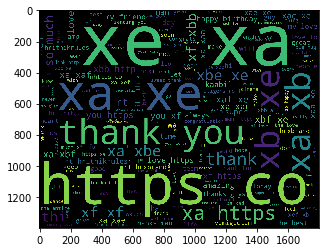

In [19]:
plt.imshow(wordcloud_ip)

In [20]:
pos=pd.read_csv('D:\ms\positive_words.txt')
pos.head()

a+
0      abound
1     abounds
2   abundance
3    abundant
4  accessable

In [21]:
pos_lst=pos.values.tolist()
pos_lst

[['abound'],
 ['abounds'],
 ['abundance'],
 ['abundant'],
 ['accessable'],
 ['accessible'],
 ['acclaim'],
 ['acclaimed'],
 ['acclamation'],
 ['accolade'],
 ['accolades'],
 ['accommodative'],
 ['accomodative'],
 ['accomplish'],
 ['accomplished'],
 ['accomplishment'],
 ['accomplishments'],
 ['accurate'],
 ['accurately'],
 ['achievable'],
 ['achievement'],
 ['achievements'],
 ['achievible'],
 ['acumen'],
 ['adaptable'],
 ['adaptive'],
 ['adequate'],
 ['adjustable'],
 ['admirable'],
 ['admirably'],
 ['admiration'],
 ['admire'],
 ['admirer'],
 ['admiring'],
 ['admiringly'],
 ['adorable'],
 ['adore'],
 ['adored'],
 ['adorer'],
 ['adoring'],
 ['adoringly'],
 ['adroit'],
 ['adroitly'],
 ['adulate'],
 ['adulation'],
 ['adulatory'],
 ['advanced'],
 ['advantage'],
 ['advantageous'],
 ['advantageously'],
 ['advantages'],
 ['adventuresome'],
 ['adventurous'],
 ['advocate'],
 ['advocated'],
 ['advocates'],
 ['affability'],
 ['affable'],
 ['affably'],
 ['affectation'],
 ['affection'],
 ['affectionate

In [22]:
neg=pd.read_csv('D:\\ms\\negative_words.txt')
neg.shape

(4782, 1)

In [23]:
neg.head()

2-faced
0     2-faces
1    abnormal
2     abolish
3  abominable
4  abominably

In [24]:
neg_lst=neg.values.tolist()
neg_lst

[['2-faces'],
 ['abnormal'],
 ['abolish'],
 ['abominable'],
 ['abominably'],
 ['abominate'],
 ['abomination'],
 ['abort'],
 ['aborted'],
 ['aborts'],
 ['abrade'],
 ['abrasive'],
 ['abrupt'],
 ['abruptly'],
 ['abscond'],
 ['absence'],
 ['absent-minded'],
 ['absentee'],
 ['absurd'],
 ['absurdity'],
 ['absurdly'],
 ['absurdness'],
 ['abuse'],
 ['abused'],
 ['abuses'],
 ['abusive'],
 ['abysmal'],
 ['abysmally'],
 ['abyss'],
 ['accidental'],
 ['accost'],
 ['accursed'],
 ['accusation'],
 ['accusations'],
 ['accuse'],
 ['accuses'],
 ['accusing'],
 ['accusingly'],
 ['acerbate'],
 ['acerbic'],
 ['acerbically'],
 ['ache'],
 ['ached'],
 ['aches'],
 ['achey'],
 ['aching'],
 ['acrid'],
 ['acridly'],
 ['acridness'],
 ['acrimonious'],
 ['acrimoniously'],
 ['acrimony'],
 ['adamant'],
 ['adamantly'],
 ['addict'],
 ['addicted'],
 ['addicting'],
 ['addicts'],
 ['admonish'],
 ['admonisher'],
 ['admonishingly'],
 ['admonishment'],
 ['admonition'],
 ['adulterate'],
 ['adulterated'],
 ['adulteration'],
 ['ad

In [25]:
ip_neg_in_neg = " ".join([w for w in ip_reviews_words_final if w in neg_lst])
ip_neg_in_neg

''

In [26]:
ip_pos_in_pos =" ".join ([w for w in ip_reviews_words_final if w in pos_lst])
ip_pos_in_pos

''

In [27]:
tweet_unique_words = list(set(ip_rev_string.split(" ")))
tweet_unique_words

['',
 'ri',
 'owe',
 'czt',
 'sweeter',
 'akshay',
 'aliaa',
 'bjuvn',
 'yiszy',
 'kabir',
 'xuewch',
 'desire',
 'blush',
 'arjunk',
 'npower',
 'direction',
 'komalnahta',
 'foxstarhindi',
 'utdmj',
 'xz',
 'nyw',
 'st',
 'wua',
 'generosity',
 'holds',
 'aans',
 'baat',
 'lpwzyjqvvu',
 'pillar',
 'ibjw',
 'officialneha',
 'misaal',
 'cutie',
 'jpg',
 'qmsi',
 'dbki',
 'wheelers',
 'ameans',
 'vxbw',
 'launches',
 'hyderabad',
 'whatateam',
 'wywasbfef',
 'uae',
 'cake',
 'epitomizes',
 'agichaashu',
 'newest',
 'xzzclv',
 'video',
 'baar',
 'stargoldindia',
 'sidharth',
 'auur',
 'umn',
 'ami',
 'delivered',
 'lkqa',
 'monobrand',
 'zn',
 'watched',
 'best',
 'already',
 'krishna',
 'mnmmiunxtt',
 'visit',
 'benefits',
 'issues',
 'children',
 'wugmsdfrde',
 'root',
 'writer',
 'fcqq',
 'intrigued',
 'go',
 'bhangrapaale',
 'ziz',
 'zthaofxls',
 'teamed',
 'xvjcf',
 'sdmmgg',
 'meticulous',
 'specialops',
 'kgtnzw',
 'pcdzxrg',
 'iwpmkr',
 'until',
 'kwtvsbi',
 'fear',
 'sang',
 'im

In [28]:
neg_in_neg=[]
for i in tweet_unique_words:
    for j in neg_lst:
        if i==j:
            append(neg_in_neg)
        else:
            None

In [39]:
srs=my_tweets.text
string=srs.to_string()
sa=string.split()

In [42]:
from textblob import TextBlob
pol=[]
for i in my_tweets.text:
    tweet = TextBlob(i)
    pol.append(tweet.sentiment.polarity)

In [43]:
pol

[0.27367424242424243,
 0.0,
 0.0,
 0.0,
 1.0,
 0.41666666666666663,
 0.0,
 0.75,
 0.16,
 0.7333333333333334,
 0.5,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 -0.2,
 0.05,
 0.22857142857142856,
 0.625,
 0.6666666666666666,
 0.75,
 0.5,
 0.7875,
 0.23333333333333336,
 0.6,
 0.7,
 0.5416666666666666,
 0.7222222222222222,
 1.0,
 0.85,
 0.9,
 -0.0625,
 0.5333333333333333,
 0.0,
 0.3,
 0.5444444444444444,
 0.4166666666666667,
 0.20666666666666664,
 0.5,
 0.35,
 0.5,
 0.5,
 0.0,
 -0.375,
 0.8,
 0.0,
 0.13636363636363635,
 1.0,
 0.3,
 0.05,
 0.0,
 -0.25,
 0.7,
 0.375,
 0.3,
 0.8250000000000001,
 0.6875,
 0.65,
 0.0,
 0.0,
 0.0,
 0.6000000000000001,
 0.8,
 0.0,
 0.75,
 0.425,
 0.0,
 0.3140625,
 0.0,
 0.13333333333333341,
 0.0,
 1.0,
 0.8,
 0.0,
 0.16,
 0.39107142857142857,
 0.2,
 0.2,
 0.75,
 0.2,
 0.25,
 0.30000000000000004,
 0.26666666666666666,
 -0.04999999999999999,
 0.4621212121212121,
 0.0625,
 0.0,
 0.2372727272727273,
 0.04305555555555557,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.22999999999999998,
 0.0,
 

In [73]:
def sentiment(i):
    if i.sentiment.polarity<0:
        sentiment='negative'
    elif i.sentiment.polarity==0:
        sentiment='neutral'
    else:
        sentiment='positive'

In [74]:
sentiment_polarity=pd.Series(pol)

In [75]:
my_tweets['sentiment_polarity']=sentiment_polarity

In [76]:
my_tweets.head()

time                                           hashtags  \
0  2020-07-23 06:49:21                                                 []   
1  2020-07-16 13:02:31  [{'text': 'DarrKeAageJeetHai', 'indices': [97,...   
2  2020-07-16 05:39:10                                                 []   
3  2020-07-15 16:20:05                                                 []   
4  2020-07-14 15:18:42                                                 []   

                                       user_mentions favorite_count   geo  \
0  [{'screen_name': 'rado', 'name': 'Rado', 'id':...          10554  None   
1                                                 []           6960  None   
2                                                 []         103440  None   
3                                                 []          19359  None   
4                                                 []          10777  None   

                id_str lang place retweet_count retweeted              source  \
0  1286191656740429824   en  None           750     False  Twitter for iPhone   
1  1283748849127788545   en  None           586     False  Twitter for iPhone   
2  1283637275666989056   en  None          3132     False  Twitter for iPhone   
3  1283436179753512961   hi  None           804     False  Twitter for iPhone   
4  1283058348099805184   en  None           688     False  Twitter for iPhone   

                                                text location            name  \
0  b'Super excited to announce my first ever watc...           Hrithik Roshan   
1  b'Darr toh lagta hi hai ji, par namumkin kuch ...           Hrithik Roshan   
2  b'Morning \xe2\x98\x80\xef\xb8\x8f https://t.c...           Hrithik Roshan   
3  b'\xe0\xa4\x87\xe0\xa4\xa8 \xe0\xa4\xae\xe0\xa...           Hrithik Roshan   
4  b'Thank you from all our hearts as a family fo...           Hrithik Roshan   

  time_zone utc_offset  sentiment polarity  sentiment_polarity sentiment  
0      None       None            0.273674            0.273674  positive  
1      None       None            0.000000            0.000000   neutral  
2      None       None            0.000000            0.000000   neutral  
3      None       None            0.000000            0.000000   neutral  
4      None       None            1.000000            1.000000  positive

In [77]:
my_tweets['sentiment']=None

In [78]:
my_tweets.head()

time                                           hashtags  \
0  2020-07-23 06:49:21                                                 []   
1  2020-07-16 13:02:31  [{'text': 'DarrKeAageJeetHai', 'indices': [97,...   
2  2020-07-16 05:39:10                                                 []   
3  2020-07-15 16:20:05                                                 []   
4  2020-07-14 15:18:42                                                 []   

                                       user_mentions favorite_count   geo  \
0  [{'screen_name': 'rado', 'name': 'Rado', 'id':...          10554  None   
1                                                 []           6960  None   
2                                                 []         103440  None   
3                                                 []          19359  None   
4                                                 []          10777  None   

                id_str lang place retweet_count retweeted              source  \
0  1286191656740429824   en  None           750     False  Twitter for iPhone   
1  1283748849127788545   en  None           586     False  Twitter for iPhone   
2  1283637275666989056   en  None          3132     False  Twitter for iPhone   
3  1283436179753512961   hi  None           804     False  Twitter for iPhone   
4  1283058348099805184   en  None           688     False  Twitter for iPhone   

                                                text location            name  \
0  b'Super excited to announce my first ever watc...           Hrithik Roshan   
1  b'Darr toh lagta hi hai ji, par namumkin kuch ...           Hrithik Roshan   
2  b'Morning \xe2\x98\x80\xef\xb8\x8f https://t.c...           Hrithik Roshan   
3  b'\xe0\xa4\x87\xe0\xa4\xa8 \xe0\xa4\xae\xe0\xa...           Hrithik Roshan   
4  b'Thank you from all our hearts as a family fo...           Hrithik Roshan   

  time_zone utc_offset  sentiment polarity  sentiment_polarity sentiment  
0      None       None            0.273674            0.273674      None  
1      None       None            0.000000            0.000000      None  
2      None       None            0.000000            0.000000      None  
3      None       None            0.000000            0.000000      None  
4      None       None            1.000000            1.000000      None

In [79]:
my_tweets.loc[my_tweets.sentiment_polarity<0,'sentiment']='negative'
my_tweets.loc[my_tweets.sentiment_polarity==0,'sentiment']='neutral'
my_tweets.loc[my_tweets.sentiment_polarity>0,'sentiment']='positive'

In [80]:
my_tweets.head()

time                                           hashtags  \
0  2020-07-23 06:49:21                                                 []   
1  2020-07-16 13:02:31  [{'text': 'DarrKeAageJeetHai', 'indices': [97,...   
2  2020-07-16 05:39:10                                                 []   
3  2020-07-15 16:20:05                                                 []   
4  2020-07-14 15:18:42                                                 []   

                                       user_mentions favorite_count   geo  \
0  [{'screen_name': 'rado', 'name': 'Rado', 'id':...          10554  None   
1                                                 []           6960  None   
2                                                 []         103440  None   
3                                                 []          19359  None   
4                                                 []          10777  None   

                id_str lang place retweet_count retweeted              source  \
0  1286191656740429824   en  None           750     False  Twitter for iPhone   
1  1283748849127788545   en  None           586     False  Twitter for iPhone   
2  1283637275666989056   en  None          3132     False  Twitter for iPhone   
3  1283436179753512961   hi  None           804     False  Twitter for iPhone   
4  1283058348099805184   en  None           688     False  Twitter for iPhone   

                                                text location            name  \
0  b'Super excited to announce my first ever watc...           Hrithik Roshan   
1  b'Darr toh lagta hi hai ji, par namumkin kuch ...           Hrithik Roshan   
2  b'Morning \xe2\x98\x80\xef\xb8\x8f https://t.c...           Hrithik Roshan   
3  b'\xe0\xa4\x87\xe0\xa4\xa8 \xe0\xa4\xae\xe0\xa...           Hrithik Roshan   
4  b'Thank you from all our hearts as a family fo...           Hrithik Roshan   

  time_zone utc_offset  sentiment polarity  sentiment_polarity sentiment  
0      None       None            0.273674            0.273674  positive  
1      None       None            0.000000            0.000000   neutral  
2      None       None            0.000000            0.000000   neutral  
3      None       None            0.000000            0.000000   neutral  
4      None       None            1.000000            1.000000  positive

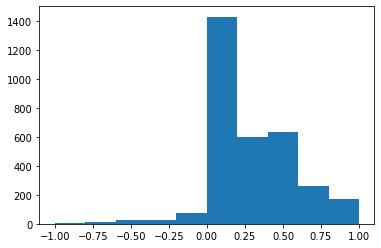

In [148]:
plt.hist(my_tweets.sentiment_polarity)
plt.show()

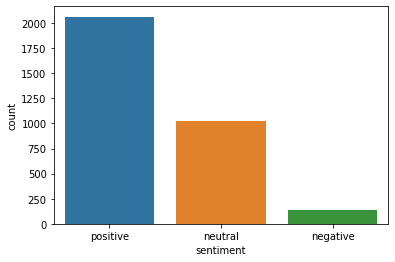

In [150]:
import seaborn as sns
sns.countplot(my_tweets.sentiment)
plt.show()

In [124]:
neg = ([my_tweets.text for i in my_tweets.sentiment if i=='negative'])
print(len(neg))
print(neg)

142
[0       b'Super excited to announce my first ever watc...
1       b'Darr toh lagta hi hai ji, par namumkin kuch ...
2       b'Morning \xe2\x98\x80\xef\xb8\x8f https://t.c...
3       b'\xe0\xa4\x87\xe0\xa4\xa8 \xe0\xa4\xae\xe0\xa...
4       b'Thank you from all our hearts as a family fo...
                              ...                        
3227    b'One for the color combination . Pink and bro...
3228    b'Chalo last one only for the high pants and t...
3229    b'Ur funny not beating your beauty. Sorry http...
3230    b'Dude , are u ok? Someone call a doc https://...
3231    b'Sab hat Jao, isse funny aur kuch possible hi...
Name: text, Length: 3232, dtype: object, 0       b'Super excited to announce my first ever watc...
1       b'Darr toh lagta hi hai ji, par namumkin kuch ...
2       b'Morning \xe2\x98\x80\xef\xb8\x8f https://t.c...
3       b'\xe0\xa4\x87\xe0\xa4\xa8 \xe0\xa4\xae\xe0\xa...
4       b'Thank you from all our hearts as a family fo...
                          

In [125]:
neg_without_index=[i[1] for i in neg]
neg_without_index

["b'Darr toh lagta hi hai ji, par namumkin kuch nahi... Inke badtein kadam hi dete yakeen hai.... Ki #DarrKeAageJeetHai\\xe2\\x80\\xa6 https://t.co/spLsvwf4Xq'",
 "b'Darr toh lagta hi hai ji, par namumkin kuch nahi... Inke badtein kadam hi dete yakeen hai.... Ki #DarrKeAageJeetHai\\xe2\\x80\\xa6 https://t.co/spLsvwf4Xq'",
 "b'Darr toh lagta hi hai ji, par namumkin kuch nahi... Inke badtein kadam hi dete yakeen hai.... Ki #DarrKeAageJeetHai\\xe2\\x80\\xa6 https://t.co/spLsvwf4Xq'",
 "b'Darr toh lagta hi hai ji, par namumkin kuch nahi... Inke badtein kadam hi dete yakeen hai.... Ki #DarrKeAageJeetHai\\xe2\\x80\\xa6 https://t.co/spLsvwf4Xq'",
 "b'Darr toh lagta hi hai ji, par namumkin kuch nahi... Inke badtein kadam hi dete yakeen hai.... Ki #DarrKeAageJeetHai\\xe2\\x80\\xa6 https://t.co/spLsvwf4Xq'",
 "b'Darr toh lagta hi hai ji, par namumkin kuch nahi... Inke badtein kadam hi dete yakeen hai.... Ki #DarrKeAageJeetHai\\xe2\\x80\\xa6 https://t.co/spLsvwf4Xq'",
 "b'Darr toh lagta hi hai ji

In [126]:
def listToString(s):
    # initialize an empty string
    str1 = " "
    return (str1.join(s))
neg_string=listToString(neg_without_index)
neg_string

"b'Darr toh lagta hi hai ji, par namumkin kuch nahi... Inke badtein kadam hi dete yakeen hai.... Ki #DarrKeAageJeetHai\\xe2\\x80\\xa6 https://t.co/spLsvwf4Xq' b'Darr toh lagta hi hai ji, par namumkin kuch nahi... Inke badtein kadam hi dete yakeen hai.... Ki #DarrKeAageJeetHai\\xe2\\x80\\xa6 https://t.co/spLsvwf4Xq' b'Darr toh lagta hi hai ji, par namumkin kuch nahi... Inke badtein kadam hi dete yakeen hai.... Ki #DarrKeAageJeetHai\\xe2\\x80\\xa6 https://t.co/spLsvwf4Xq' b'Darr toh lagta hi hai ji, par namumkin kuch nahi... Inke badtein kadam hi dete yakeen hai.... Ki #DarrKeAageJeetHai\\xe2\\x80\\xa6 https://t.co/spLsvwf4Xq' b'Darr toh lagta hi hai ji, par namumkin kuch nahi... Inke badtein kadam hi dete yakeen hai.... Ki #DarrKeAageJeetHai\\xe2\\x80\\xa6 https://t.co/spLsvwf4Xq' b'Darr toh lagta hi hai ji, par namumkin kuch nahi... Inke badtein kadam hi dete yakeen hai.... Ki #DarrKeAageJeetHai\\xe2\\x80\\xa6 https://t.co/spLsvwf4Xq' b'Darr toh lagta hi hai ji, par namumkin kuch nahi.

In [135]:
wordcloud_neg = WordCloud(
                      background_color='red',
                      width=1800,
                      height=1400
                     ).generate(neg_string)

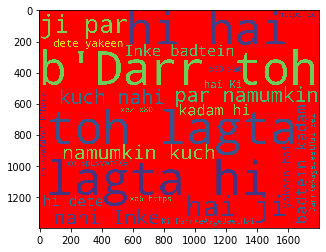

In [136]:
plt.imshow(wordcloud_neg)
plt.show()

In [131]:
pos = ([my_tweets.text for i in my_tweets.sentiment if i=='positive'])
print(len(pos))
print(pos)

2064
[0       b'Super excited to announce my first ever watc...
1       b'Darr toh lagta hi hai ji, par namumkin kuch ...
2       b'Morning \xe2\x98\x80\xef\xb8\x8f https://t.c...
3       b'\xe0\xa4\x87\xe0\xa4\xa8 \xe0\xa4\xae\xe0\xa...
4       b'Thank you from all our hearts as a family fo...
                              ...                        
3227    b'One for the color combination . Pink and bro...
3228    b'Chalo last one only for the high pants and t...
3229    b'Ur funny not beating your beauty. Sorry http...
3230    b'Dude , are u ok? Someone call a doc https://...
3231    b'Sab hat Jao, isse funny aur kuch possible hi...
Name: text, Length: 3232, dtype: object, 0       b'Super excited to announce my first ever watc...
1       b'Darr toh lagta hi hai ji, par namumkin kuch ...
2       b'Morning \xe2\x98\x80\xef\xb8\x8f https://t.c...
3       b'\xe0\xa4\x87\xe0\xa4\xa8 \xe0\xa4\xae\xe0\xa...
4       b'Thank you from all our hearts as a family fo...
                         

In [132]:
pos_without_index=[i[1] for i in pos]
pos_without_index

["b'Darr toh lagta hi hai ji, par namumkin kuch nahi... Inke badtein kadam hi dete yakeen hai.... Ki #DarrKeAageJeetHai\\xe2\\x80\\xa6 https://t.co/spLsvwf4Xq'",
 "b'Darr toh lagta hi hai ji, par namumkin kuch nahi... Inke badtein kadam hi dete yakeen hai.... Ki #DarrKeAageJeetHai\\xe2\\x80\\xa6 https://t.co/spLsvwf4Xq'",
 "b'Darr toh lagta hi hai ji, par namumkin kuch nahi... Inke badtein kadam hi dete yakeen hai.... Ki #DarrKeAageJeetHai\\xe2\\x80\\xa6 https://t.co/spLsvwf4Xq'",
 "b'Darr toh lagta hi hai ji, par namumkin kuch nahi... Inke badtein kadam hi dete yakeen hai.... Ki #DarrKeAageJeetHai\\xe2\\x80\\xa6 https://t.co/spLsvwf4Xq'",
 "b'Darr toh lagta hi hai ji, par namumkin kuch nahi... Inke badtein kadam hi dete yakeen hai.... Ki #DarrKeAageJeetHai\\xe2\\x80\\xa6 https://t.co/spLsvwf4Xq'",
 "b'Darr toh lagta hi hai ji, par namumkin kuch nahi... Inke badtein kadam hi dete yakeen hai.... Ki #DarrKeAageJeetHai\\xe2\\x80\\xa6 https://t.co/spLsvwf4Xq'",
 "b'Darr toh lagta hi hai ji

In [134]:
pos_string=listToString(pos_without_index)
pos_string

"b'Darr toh lagta hi hai ji, par namumkin kuch nahi... Inke badtein kadam hi dete yakeen hai.... Ki #DarrKeAageJeetHai\\xe2\\x80\\xa6 https://t.co/spLsvwf4Xq' b'Darr toh lagta hi hai ji, par namumkin kuch nahi... Inke badtein kadam hi dete yakeen hai.... Ki #DarrKeAageJeetHai\\xe2\\x80\\xa6 https://t.co/spLsvwf4Xq' b'Darr toh lagta hi hai ji, par namumkin kuch nahi... Inke badtein kadam hi dete yakeen hai.... Ki #DarrKeAageJeetHai\\xe2\\x80\\xa6 https://t.co/spLsvwf4Xq' b'Darr toh lagta hi hai ji, par namumkin kuch nahi... Inke badtein kadam hi dete yakeen hai.... Ki #DarrKeAageJeetHai\\xe2\\x80\\xa6 https://t.co/spLsvwf4Xq' b'Darr toh lagta hi hai ji, par namumkin kuch nahi... Inke badtein kadam hi dete yakeen hai.... Ki #DarrKeAageJeetHai\\xe2\\x80\\xa6 https://t.co/spLsvwf4Xq' b'Darr toh lagta hi hai ji, par namumkin kuch nahi... Inke badtein kadam hi dete yakeen hai.... Ki #DarrKeAageJeetHai\\xe2\\x80\\xa6 https://t.co/spLsvwf4Xq' b'Darr toh lagta hi hai ji, par namumkin kuch nahi.

In [139]:
wordcloud_pos= WordCloud(
                      background_color='green',
                      width=1800,
                      height=1400
                     ).generate(pos_string)

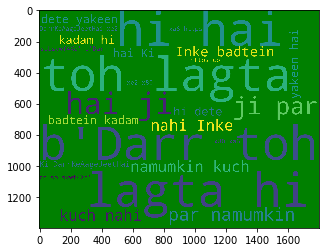

In [141]:
plt.imshow(wordcloud_pos)
plt.show()

In [142]:
neut = ([my_tweets.text for i in my_tweets.sentiment if i=='neutral'])
print(len(neut))
print(neut)

1026
[0       b'Super excited to announce my first ever watc...
1       b'Darr toh lagta hi hai ji, par namumkin kuch ...
2       b'Morning \xe2\x98\x80\xef\xb8\x8f https://t.c...
3       b'\xe0\xa4\x87\xe0\xa4\xa8 \xe0\xa4\xae\xe0\xa...
4       b'Thank you from all our hearts as a family fo...
                              ...                        
3227    b'One for the color combination . Pink and bro...
3228    b'Chalo last one only for the high pants and t...
3229    b'Ur funny not beating your beauty. Sorry http...
3230    b'Dude , are u ok? Someone call a doc https://...
3231    b'Sab hat Jao, isse funny aur kuch possible hi...
Name: text, Length: 3232, dtype: object, 0       b'Super excited to announce my first ever watc...
1       b'Darr toh lagta hi hai ji, par namumkin kuch ...
2       b'Morning \xe2\x98\x80\xef\xb8\x8f https://t.c...
3       b'\xe0\xa4\x87\xe0\xa4\xa8 \xe0\xa4\xae\xe0\xa...
4       b'Thank you from all our hearts as a family fo...
                         

In [143]:
neut_without_index=[i[1] for i in neut]
neut_without_index

["b'Darr toh lagta hi hai ji, par namumkin kuch nahi... Inke badtein kadam hi dete yakeen hai.... Ki #DarrKeAageJeetHai\\xe2\\x80\\xa6 https://t.co/spLsvwf4Xq'",
 "b'Darr toh lagta hi hai ji, par namumkin kuch nahi... Inke badtein kadam hi dete yakeen hai.... Ki #DarrKeAageJeetHai\\xe2\\x80\\xa6 https://t.co/spLsvwf4Xq'",
 "b'Darr toh lagta hi hai ji, par namumkin kuch nahi... Inke badtein kadam hi dete yakeen hai.... Ki #DarrKeAageJeetHai\\xe2\\x80\\xa6 https://t.co/spLsvwf4Xq'",
 "b'Darr toh lagta hi hai ji, par namumkin kuch nahi... Inke badtein kadam hi dete yakeen hai.... Ki #DarrKeAageJeetHai\\xe2\\x80\\xa6 https://t.co/spLsvwf4Xq'",
 "b'Darr toh lagta hi hai ji, par namumkin kuch nahi... Inke badtein kadam hi dete yakeen hai.... Ki #DarrKeAageJeetHai\\xe2\\x80\\xa6 https://t.co/spLsvwf4Xq'",
 "b'Darr toh lagta hi hai ji, par namumkin kuch nahi... Inke badtein kadam hi dete yakeen hai.... Ki #DarrKeAageJeetHai\\xe2\\x80\\xa6 https://t.co/spLsvwf4Xq'",
 "b'Darr toh lagta hi hai ji

In [144]:
neut_string=listToString(neut_without_index)
neut_string

"b'Darr toh lagta hi hai ji, par namumkin kuch nahi... Inke badtein kadam hi dete yakeen hai.... Ki #DarrKeAageJeetHai\\xe2\\x80\\xa6 https://t.co/spLsvwf4Xq' b'Darr toh lagta hi hai ji, par namumkin kuch nahi... Inke badtein kadam hi dete yakeen hai.... Ki #DarrKeAageJeetHai\\xe2\\x80\\xa6 https://t.co/spLsvwf4Xq' b'Darr toh lagta hi hai ji, par namumkin kuch nahi... Inke badtein kadam hi dete yakeen hai.... Ki #DarrKeAageJeetHai\\xe2\\x80\\xa6 https://t.co/spLsvwf4Xq' b'Darr toh lagta hi hai ji, par namumkin kuch nahi... Inke badtein kadam hi dete yakeen hai.... Ki #DarrKeAageJeetHai\\xe2\\x80\\xa6 https://t.co/spLsvwf4Xq' b'Darr toh lagta hi hai ji, par namumkin kuch nahi... Inke badtein kadam hi dete yakeen hai.... Ki #DarrKeAageJeetHai\\xe2\\x80\\xa6 https://t.co/spLsvwf4Xq' b'Darr toh lagta hi hai ji, par namumkin kuch nahi... Inke badtein kadam hi dete yakeen hai.... Ki #DarrKeAageJeetHai\\xe2\\x80\\xa6 https://t.co/spLsvwf4Xq' b'Darr toh lagta hi hai ji, par namumkin kuch nahi.

In [145]:
wordcloud_neut= WordCloud(
                      background_color='blue',
                      width=1800,
                      height=1400
                     ).generate(neut_string)

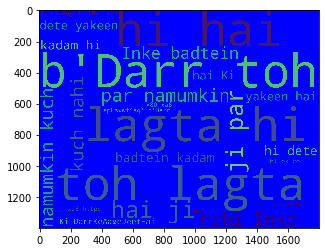

In [146]:
plt.imshow(wordcloud_neut)
plt.show()

# INSIGHT:
                 ~Hritik roshan have a very less number of tweets which has a negative sentiments.